<a href="https://colab.research.google.com/github/srinivastherapati/neural_HW2/blob/main/homeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# Define the 5x5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Reshape to match Conv2D input shape (batch_size, height, width, channels)
input_matrix = input_matrix.reshape((1, 5, 5, 1))

# Define the 3x3 kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

# Reshape kernel to match Conv2D kernel shape (height, width, in_channels, out_channels)
kernel = kernel.reshape((3, 3, 1, 1))

# Function to perform convolution
def perform_convolution(stride, padding):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), strides=(stride, stride), padding=padding,
               use_bias=False, kernel_initializer=tf.constant_initializer(kernel))
    ])
    output = model(input_matrix)
    return output.numpy().squeeze()

# Perform convolutions
outputs = {
    "Stride = 1, Padding = 'VALID'": perform_convolution(1, 'valid'),
    "Stride = 1, Padding = 'SAME'": perform_convolution(1, 'same'),
    "Stride = 2, Padding = 'VALID'": perform_convolution(2, 'valid'),
    "Stride = 2, Padding = 'SAME'": perform_convolution(2, 'same')
}

# Print results
for desc, feature_map in outputs.items():
    print(f"{desc}:")
    print(feature_map)
    print("\n")


Stride = 1, Padding = 'VALID':
[[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]


Stride = 1, Padding = 'SAME':
[[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]


Stride = 2, Padding = 'VALID':
[[-6. -6.]
 [-6. -6.]]


Stride = 2, Padding = 'SAME':
[[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]




Saving Screenshot (2).png to Screenshot (2).png


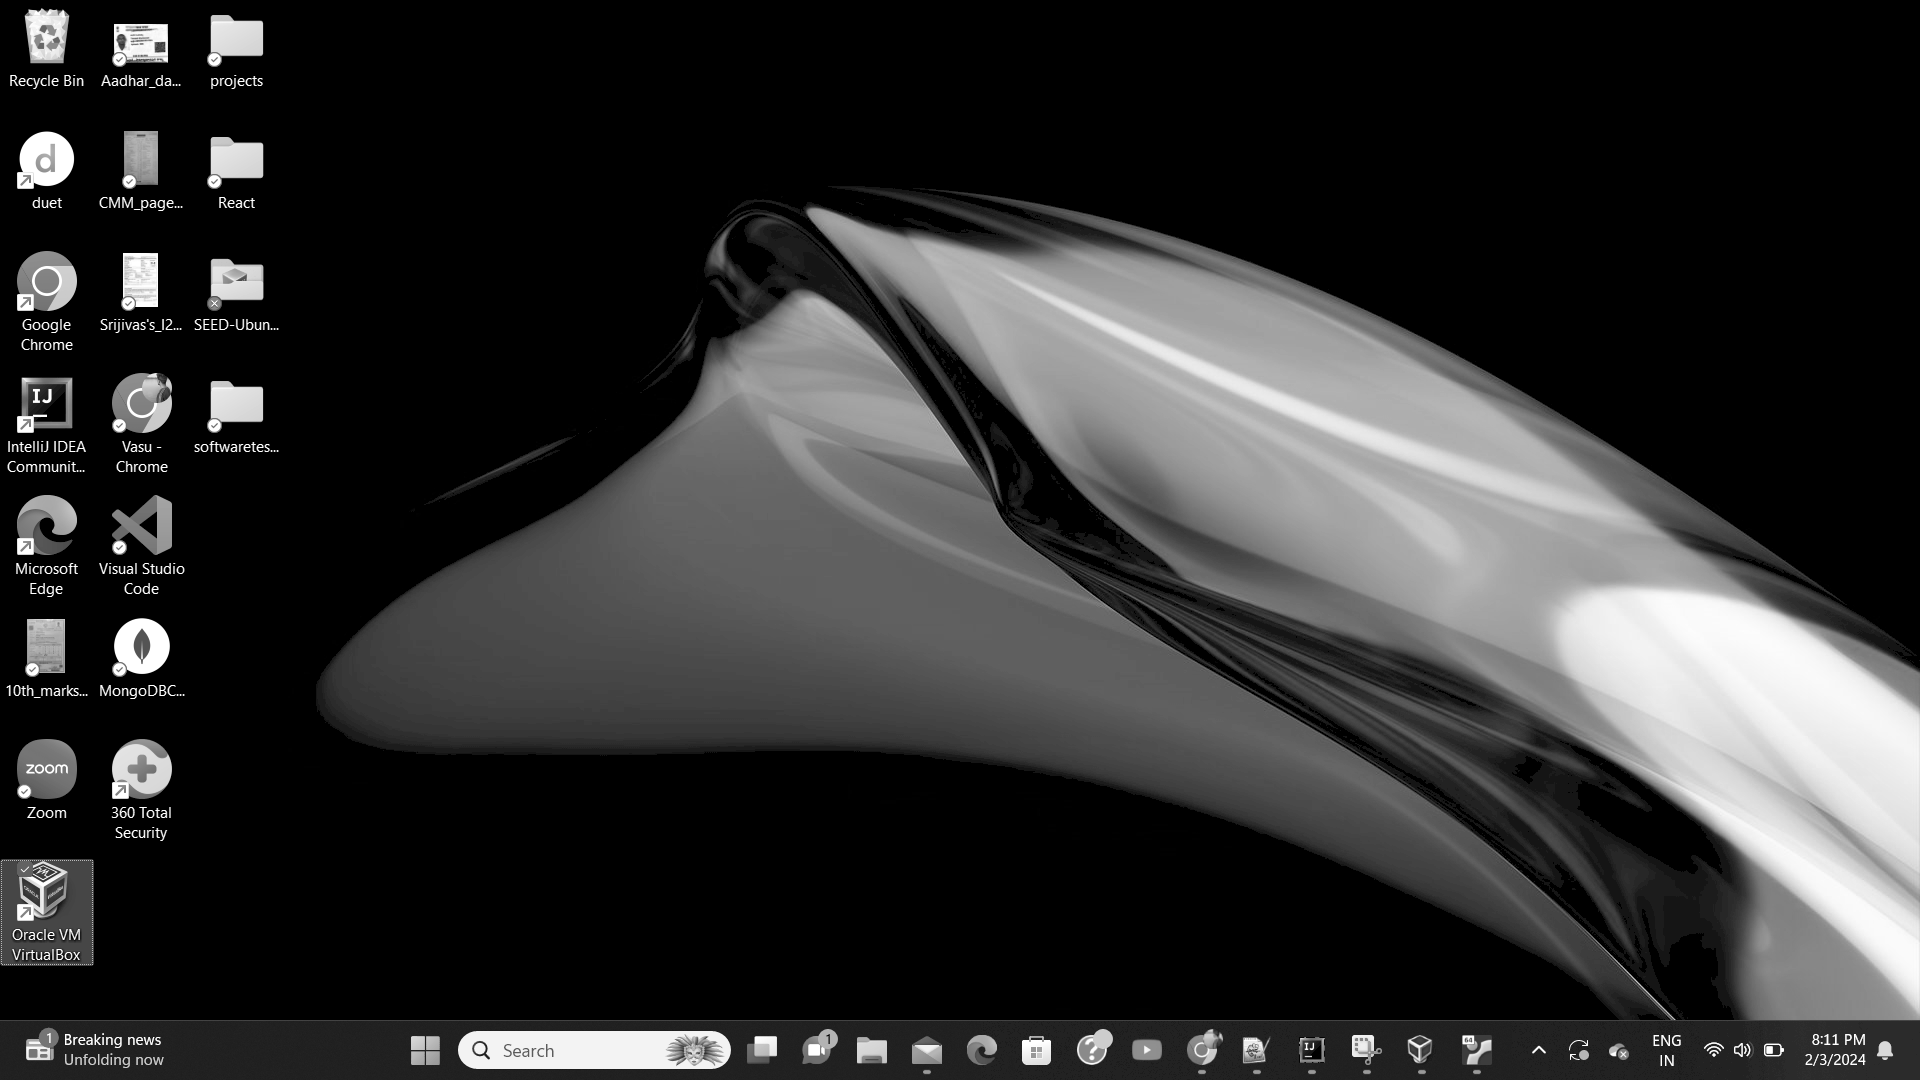

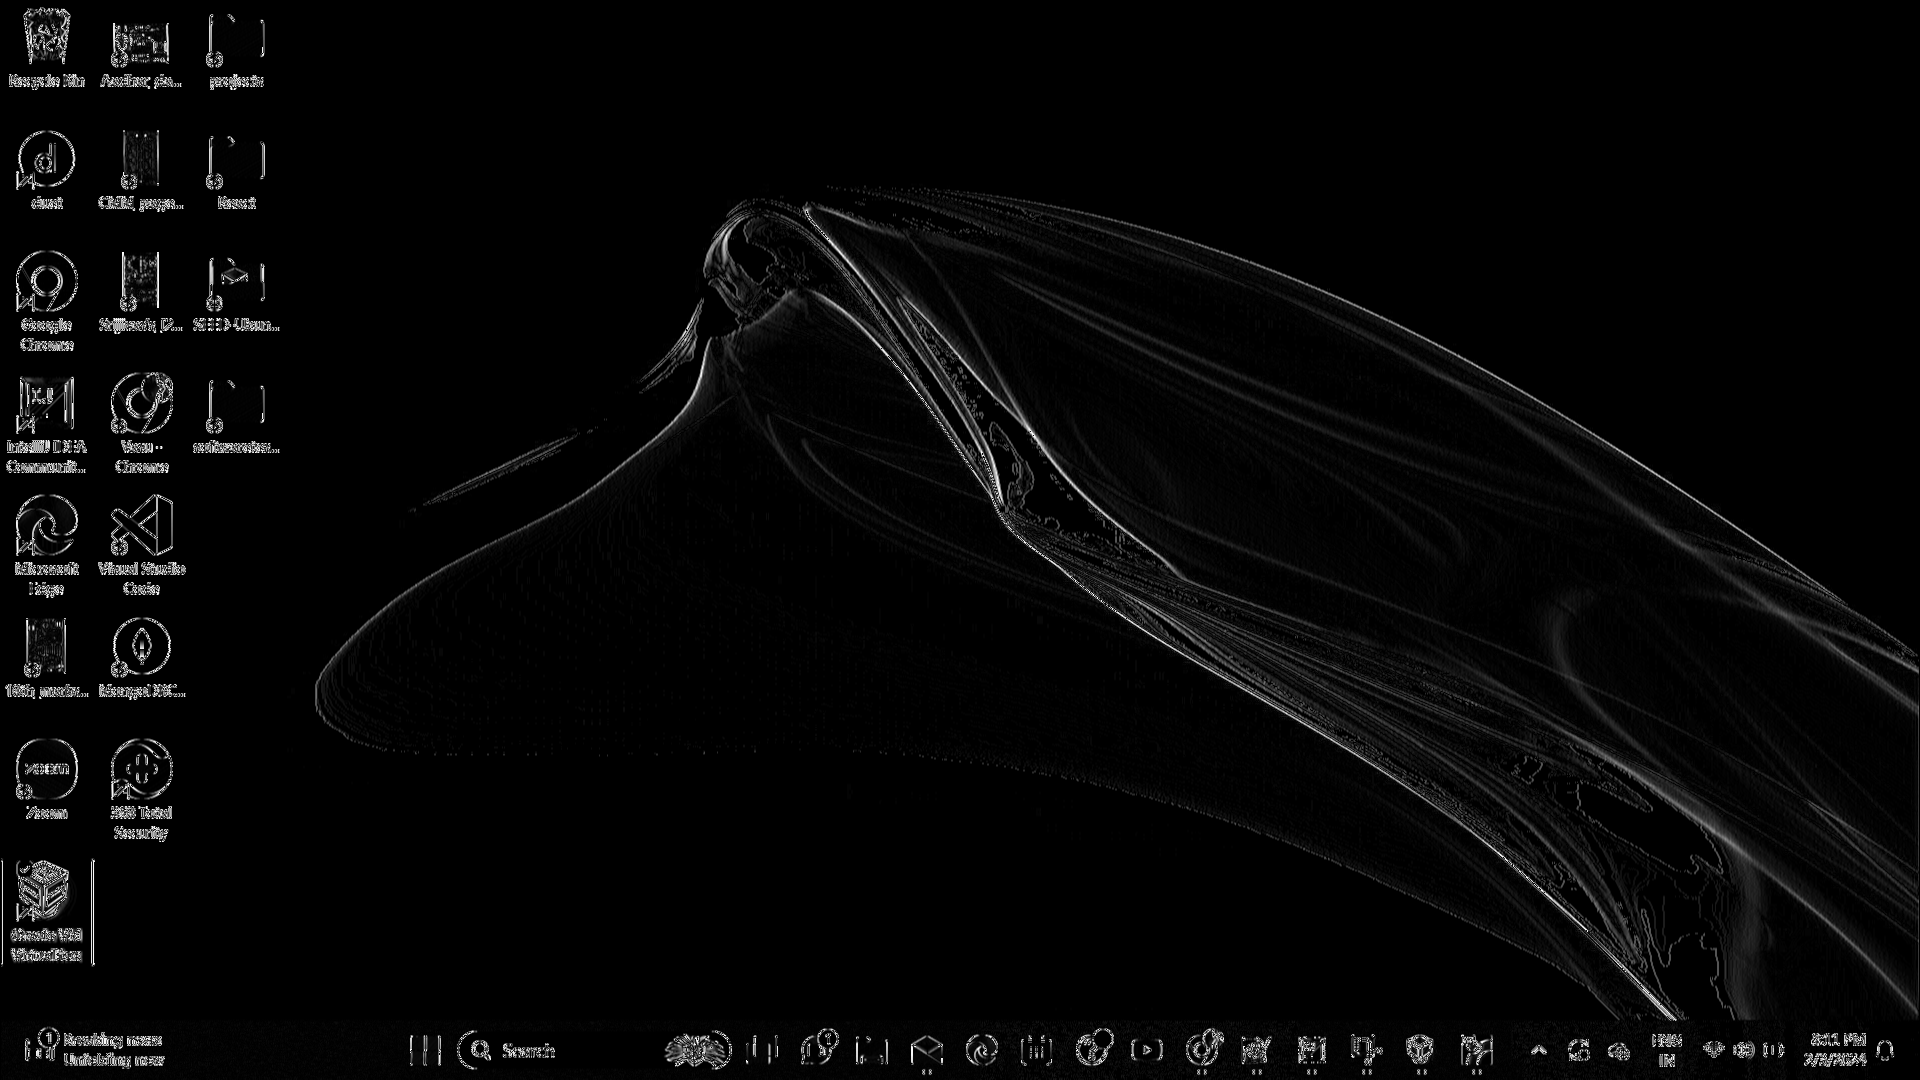

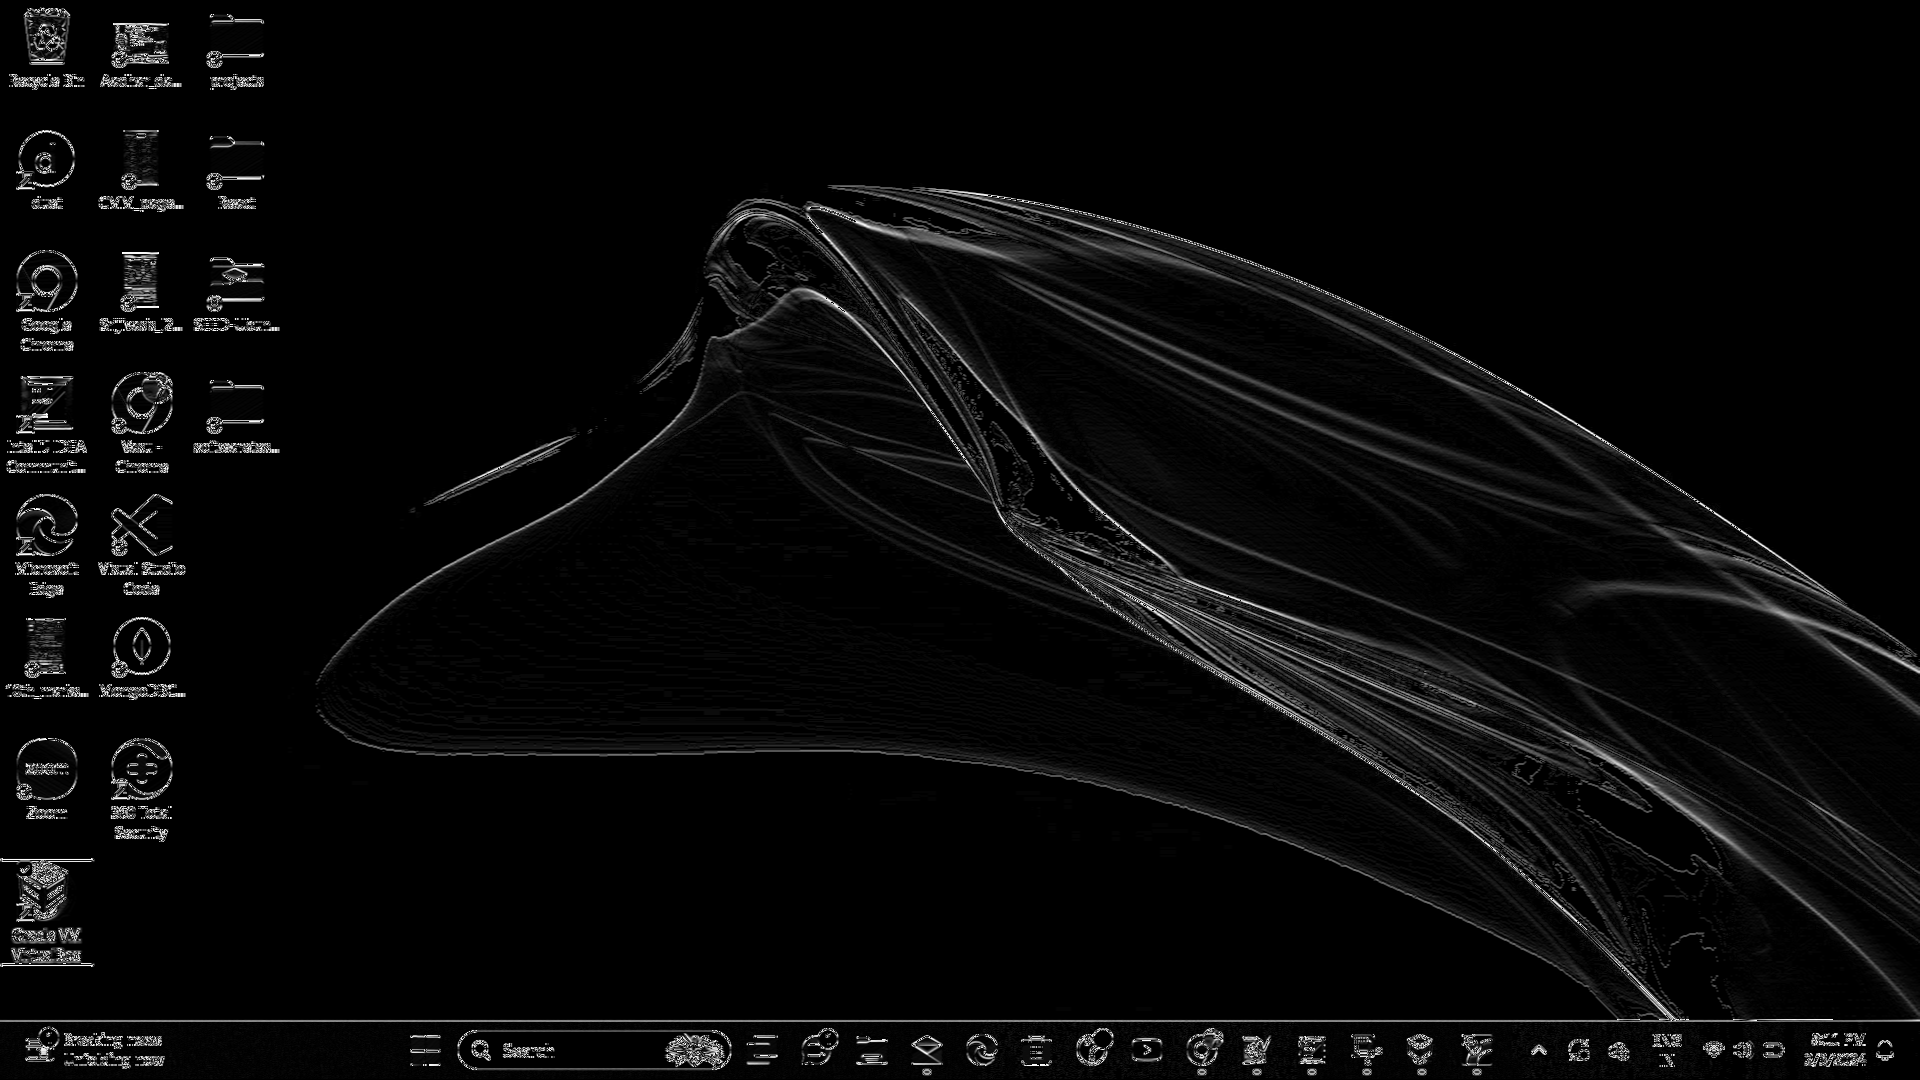

Original Matrix:
 [[242. 240. 180.  94.]
 [  1.  76.  71.  20.]
 [ 12. 218. 250. 128.]
 [125. 112. 240. 203.]]
Max Pooled Matrix:
 [[242. 180.]
 [218. 250.]]
Average Pooled Matrix:
 [[139.75  91.25]
 [116.75 205.25]]


In [3]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from google.colab import files

# Task 1: Edge Detection Using Sobel Filter
# Upload image file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load a grayscale image
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Error loading image. Please check the file upload.")

# Apply Sobel filter in x and y direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Display the images using cv2_imshow for Colab compatibility
cv2_imshow(image)
cv2_imshow(np.abs(sobel_x).astype(np.uint8))
cv2_imshow(np.abs(sobel_y).astype(np.uint8))

# Task 2: Max Pooling and Average Pooling
# Create a random 4x4 matrix
input_matrix = np.random.randint(0, 256, (1, 4, 4, 1)).astype(np.float32)

# Define pooling layers
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2)

# Apply pooling
max_pooled = max_pool(input_matrix).numpy()
avg_pooled = avg_pool(input_matrix).numpy()

# Print results
print("Original Matrix:\n", input_matrix[0, :, :, 0])
print("Max Pooled Matrix:\n", max_pooled[0, :, :, 0])
print("Average Pooled Matrix:\n", avg_pooled[0, :, :, 0])


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential

# Task 1: Implement AlexNet Architecture
def alexnet_model():
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Task 2: Implement Residual Block and ResNet-like Model
def residual_block(input_tensor, filters=64):
    x = Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])  # Skip connection
    x = Activation('relu')(x)
    return x

def resnet_like_model():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Create and print model summaries
alexnet = alexnet_model()
print("AlexNet Model Summary:")
alexnet.summary()

resnet = resnet_like_model()
print("ResNet-like Model Summary:")
resnet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AlexNet Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

ResNet-like Model Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 56, 56, 64)     │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 56, 56, 64)     │            256 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 56, 56, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
│                           │                        │                │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 64)     │            256 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
│                      

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,306 (653.54 KB)

 Non-trainable params: 512 (2.00 KB)